In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import re

In [ ]:
X = pd.read_csv("data_all.csv")  # всі feature
y_valence = pd.read_csv("valence.csv")  # валентність
y_arousal = pd.read_csv("arousal.csv")  # збудженість
y_emotion = pd.read_csv("emotion.csv")  # емоція

In [ ]:
X

,Ch1_Mean,Ch1_Std Dev,Ch1_Theta Power,Ch1_Alpha Power,Ch1_Beta Power,Ch1_Gamma Power,Ch2_Mean,Ch2_Std Dev,Ch2_Theta Power,Ch2_Alpha Power,...,8. Think about spirituality,9. Let things get messy,10. Feel worried,11. Use difficult words,12. Sympathize with others,Extraversion_y,Neuroticism_y,Conscientiousness_y,Agreeableness_y,Openness to Experience_y
0,-0.007856,12.848280,6.376499,2.953373,1.182572,0.902507,0.032383,13.196769,5.805588,2.605096,...,1,2,4,1,4,7,6,5,10,3
1,-0.029390,15.368111,10.126835,3.402572,1.055245,0.734178,-0.100979,17.402255,11.545784,3.135453,...,1,2,4,1,4,7,6,5,10,3
2,0.006996,16.017913,11.412445,3.818720,1.069875,0.635234,0.101066,19.616918,12.825493,3.197154,...,1,2,4,1,4,7,6,5,10,3
3,-0.027253,16.642966,9.899070,3.429128,0.973598,0.681272,-0.038493,18.239224,10.016335,2.955328,...,1,2,4,1,4,7,6,5,10,3
4,-0.018234,11.732200,6.696972,2.959700,0.806932,0.467701,-0.031063,14.720739,8.055340,2.666162,...,1,2,4,1,4,7,6,5,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,0.093502,16.977695,10.024260,4.188634,0.921608,0.563430,0.124918,17.093031,7.998522,3.265881,...,4,1,4,2,5,4,8,5,15,7
678,0.051983,22.143175,21.379737,10.710927,1.022601,0.392993,0.067005,19.821881,15.314154,6.700195,...,4,1,4,2,5,4,8,5,15,7
679,-0.026329,18.029723,15.205692,12.050139,0.950048,0.386221,-0.056839,17.260305,10.613487,6.716624,...,4,1,4,2,5,4,8,5,15,7
680,-0.013981,20.094219,13.989340,8.056362,0.902629,0.408105,0.025374,20.297761,11.081365,5.807567,...,4,1,4,2,5,4,8,5,15,7


In [ ]:
# y_valence= y_valence['valence'].tolist()
# y_arousal= y_arousal['arousal'].tolist()

In [ ]:
# розділення на тренувальні та тестові дані
X_train_valence, X_test_valence, y_train_valence, y_test_valence = train_test_split(X, y_valence, test_size=0.2, random_state=42)
X_train_arousal, X_test_arousal, y_train_arousal, y_test_arousal = train_test_split(X, y_arousal, test_size=0.2, random_state=42)
X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(X, y_emotion, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(y_true, y_pred, average='micro'):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average=average, zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, average=average, zero_division=0))
    print("F1 Score:", f1_score(y_true, y_pred, average=average, zero_division=0))
    print("Classification Report:\n", classification_report(y_true, y_pred, digits=4, zero_division=0))

In [ ]:
# навчання моделі
ex_model_v = ExtraTreesClassifier(n_estimators=1005,
                                    criterion='entropy',
                                    max_depth=None,
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    # max_features='sqrt',
                                    max_leaf_nodes=None,
                                    #oob_score=True,
                                    random_state=50,
                                    class_weight=None
                                    )
ex_model_v.fit(X_train_valence, y_train_valence)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesClassifier(criterion='entropy', min_samples_split=5,
                     n_estimators=1005, random_state=50)

In [ ]:
y_pred_valence = ex_model_v.predict(X_test_valence)

In [ ]:
print("\nVALENCE\nextratrees\n")
evaluate_model(y_test_valence, y_pred_valence)


VALENCE
extratrees

Accuracy: 0.20437956204379562
Classification Report:
               precision    recall  f1-score   support

           1     0.1429    0.2222    0.1739         9
           2     0.2000    0.1739    0.1860        23
           3     0.2500    0.2414    0.2456        29
           4     0.2143    0.3600    0.2687        25
           5     0.1250    0.0952    0.1081        21
           6     0.1429    0.0833    0.1053        12
           7     0.0000    0.0000    0.0000         7
           8     0.3333    0.3000    0.3158        10
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.2044       137
   macro avg     0.1565    0.1640    0.1559       137
weighted avg     0.1910    0.2044    0.1925       137



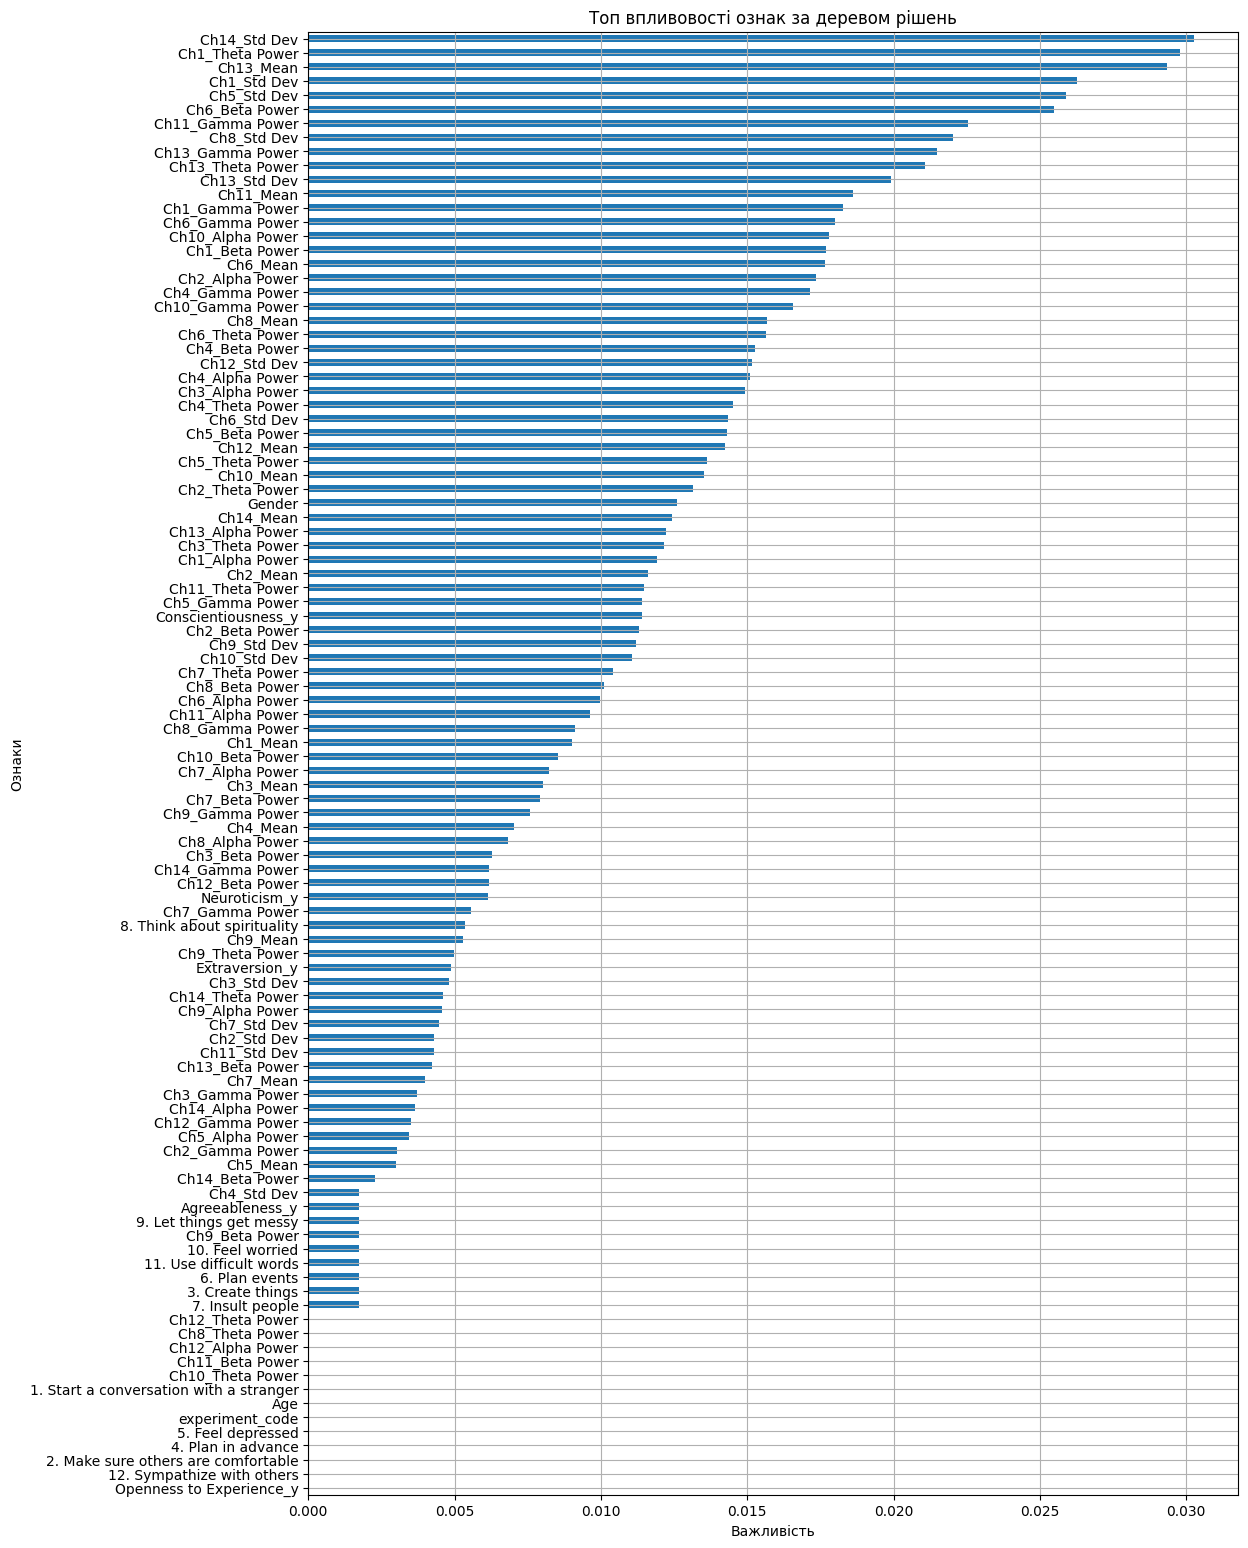

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y_valence.values.ravel())

feature_importances = model.feature_importances_

# перетворення в pandas Series для зручності
important_features = pd.Series(feature_importances, index=X.columns)

important_features_sorted = important_features.sort_values(ascending=False)

plt.figure(figsize=(12, 19))
important_features_sorted.plot(kind='barh')
plt.title('Топ впливовості ознак за деревом рішень')
plt.gca().invert_yaxis()
plt.xlabel('Важливість')
plt.ylabel('Ознаки')
plt.grid(True)
plt.show()


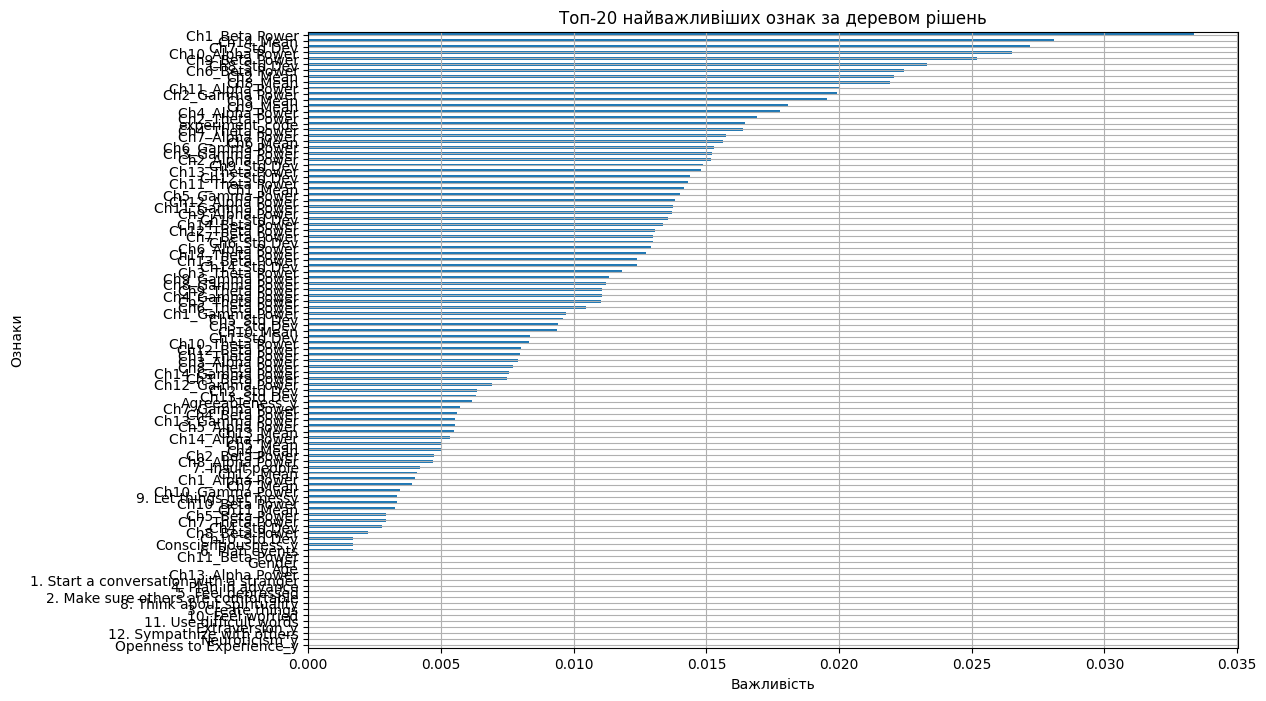

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y_arousal.values.ravel())

feature_importances = model.feature_importances_

important_features = pd.Series(feature_importances, index=X.columns)

important_features_sorted = important_features.sort_values(ascending=False)

top_features = important_features_sorted

plt.figure(figsize=(12, 8))
top_features.plot(kind='barh')
plt.title('Топ-20 найважливіших ознак за деревом рішень')
plt.gca().invert_yaxis()
plt.xlabel('Важливість')
plt.ylabel('Ознаки')
plt.grid(True)
plt.show()


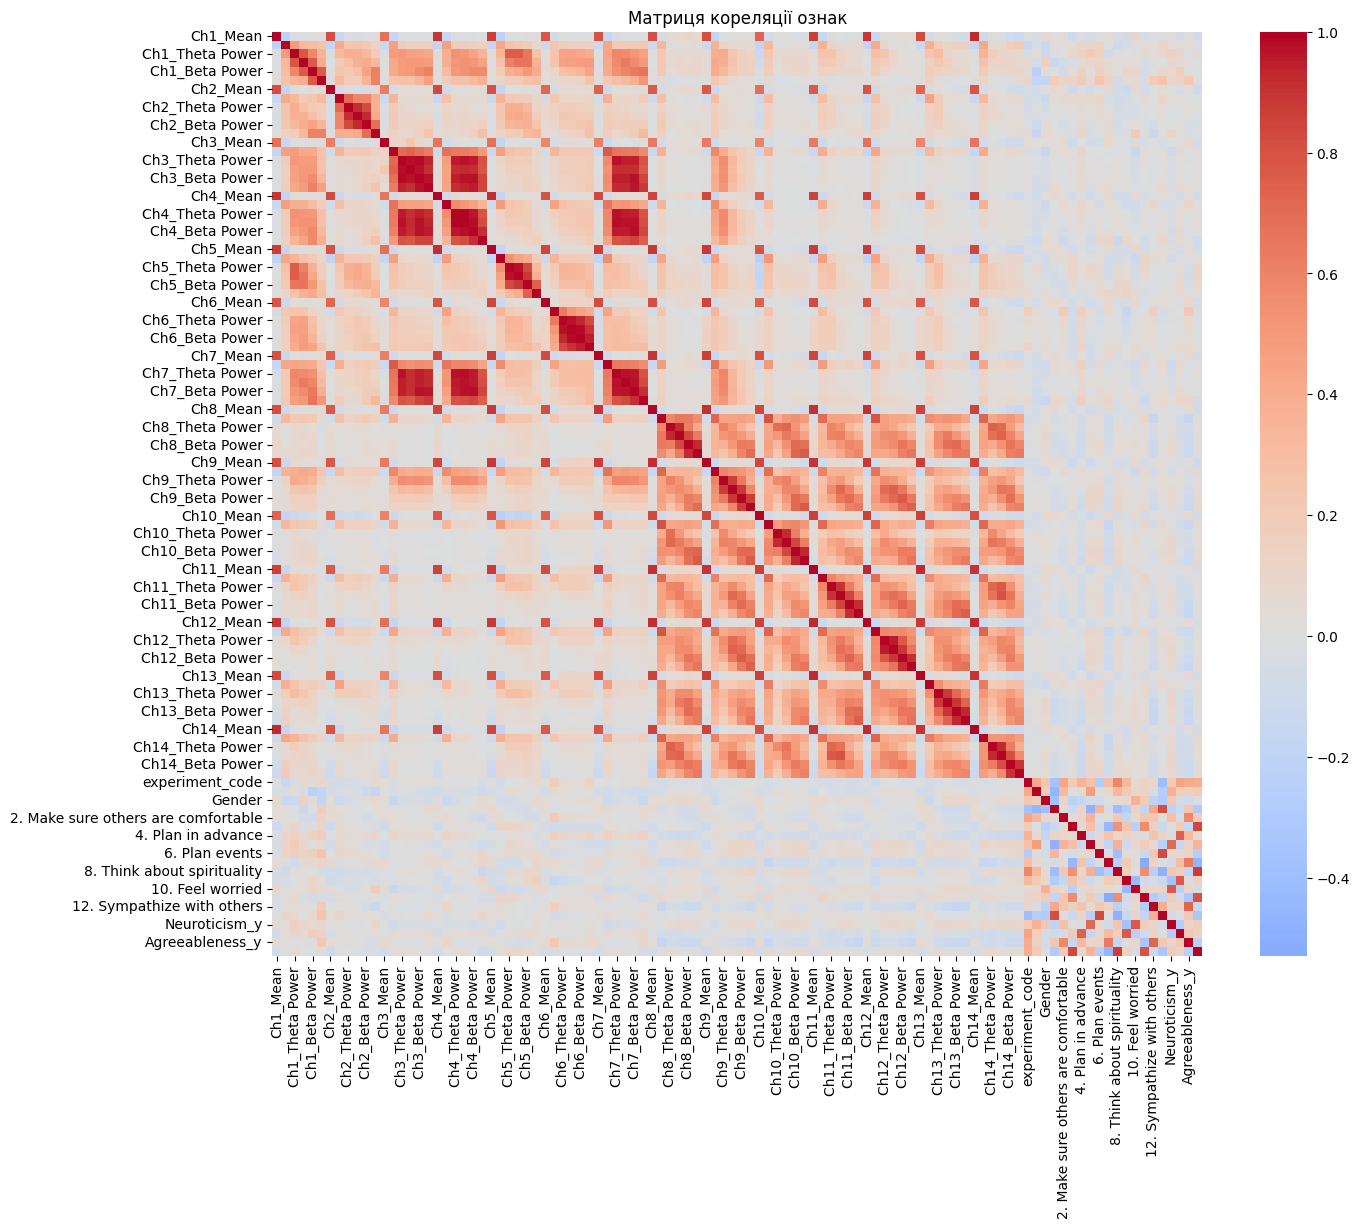

In [ ]:
import seaborn as sns

corr_matrix = X.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)

plt.title('Матриця кореляції ознак')
plt.show()


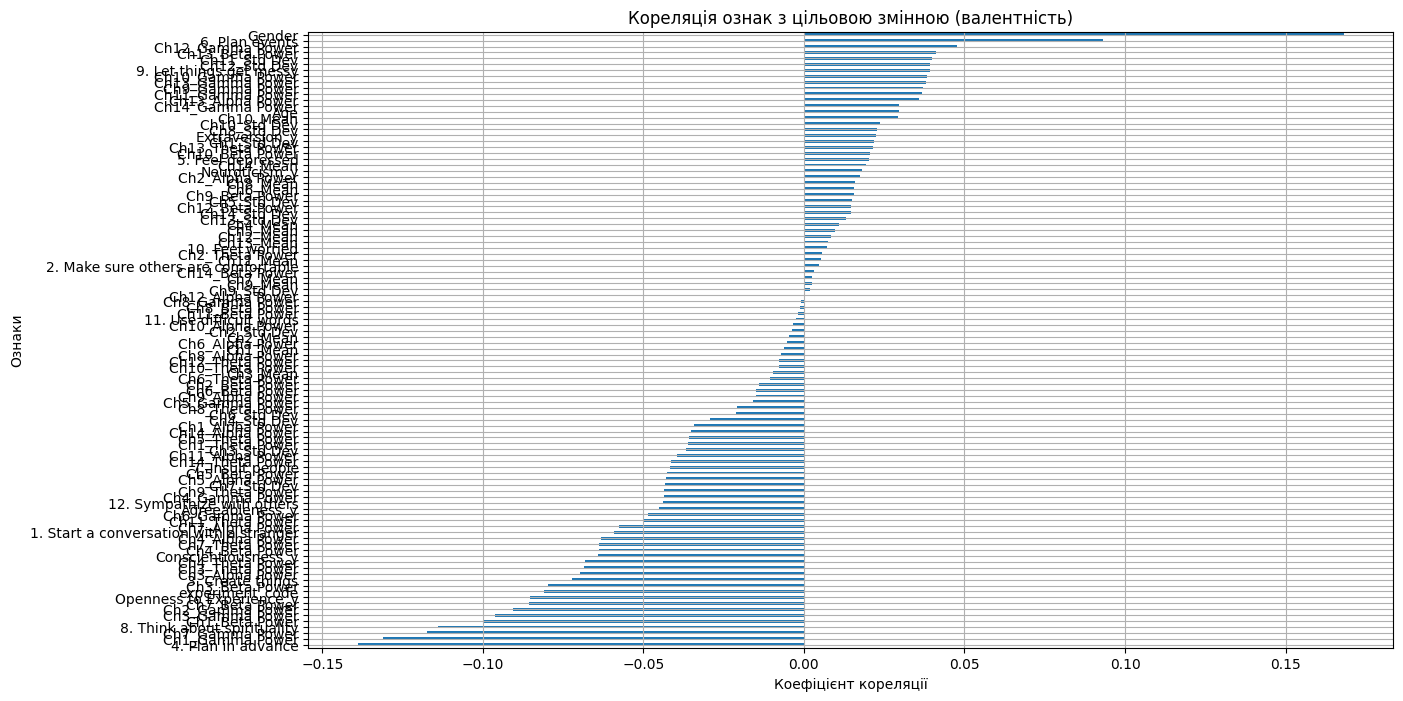

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

X_with_target = X.copy()
X_with_target['target'] = y_valence.values.ravel()

# рахуємо кореляції всіх фічей з цільовою змінною
correlations_with_target = X_with_target.corr()['target'].drop('target').sort_values(ascending=False)

plt.figure(figsize=(14, 8))
correlations_with_target.plot(kind='barh')
plt.title('Кореляція ознак з цільовою змінною (валентність)')
plt.xlabel('Коефіцієнт кореляції')
plt.ylabel('Ознаки')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()


In [ ]:
threshold = 0.05

# фільтруємо ознаки за абсолютною кореляцією
important_features_by_corr = correlations_with_target[correlations_with_target.abs() > threshold].index.tolist()

X_filtered = X[important_features_by_corr]
X_filtered

,Gender,6. Plan events,Ch11_Theta Power,Ch7_Alpha Power,1. Start a conversation with a stranger,Ch4_Alpha Power,Ch7_Theta Power,Ch4_Beta Power,Conscientiousness_y,Ch4_Theta Power,...,experiment_code,Openness to Experience_y,Ch7_Beta Power,Ch2_Gamma Power,Ch3_Gamma Power,Ch1_Beta Power,8. Think about spirituality,Ch7_Gamma Power,Ch1_Gamma Power,4. Plan in advance
0,0,3,5.362128,2.017386,4,1.862472,2.338091,0.987734,5,3.277785,...,1,3,0.830490,0.884964,0.696006,1.182572,1,0.809259,0.902507,3
1,0,3,7.508057,1.526927,4,2.037720,2.039924,0.958276,5,5.372703,...,1,3,0.644571,0.749011,0.563225,1.055245,1,0.515337,0.734178,3
2,0,3,6.014500,1.678125,4,2.022481,2.320851,0.923616,5,5.831768,...,1,3,0.683311,0.695452,0.480439,1.069875,1,0.556346,0.635234,3
3,0,3,6.093921,1.711618,4,2.001162,2.162795,0.755002,5,5.021663,...,1,3,0.664134,0.705544,0.485737,0.973598,1,0.522683,0.681272,3
4,0,3,5.804659,1.459288,4,2.345135,2.255352,0.674598,5,6.823133,...,1,3,0.472385,0.479745,0.328001,0.806932,1,0.299334,0.467701,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1,2,8.463428,3.757620,2,3.206501,3.761447,0.620860,5,17.702796,...,30,7,0.453924,0.583056,0.331533,0.921608,4,0.266955,0.563430,4
678,1,2,14.426472,15.506880,2,2.608572,5.753110,0.477709,5,18.343300,...,30,7,0.662412,0.428913,0.345134,1.022601,4,0.281444,0.392993,4
679,1,2,13.402007,15.037336,2,9.289850,5.960305,0.925513,5,74.166716,...,30,7,0.685999,0.442512,0.346094,0.950048,4,0.290007,0.386221,4
680,1,2,10.955081,11.083338,2,4.340452,4.583350,0.559995,5,32.678575,...,30,7,0.616571,0.495945,0.341371,0.902629,4,0.306597,0.408105,4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_filtered, y_valence.values.ravel(), test_size=0.2, random_state=42
)

rf_model_corr = RandomForestClassifier(random_state=42)
rf_model_corr.fit(X_train_f, y_train_f)

y_pred_f = rf_model_corr.predict(X_test_f)

print("Точність:", accuracy_score(y_test_f, y_pred_f))
print("Звіт:\n", classification_report(y_test_f, y_pred_f))


Точність: 0.21897810218978103
Звіт:
               precision    recall  f1-score   support

           1       0.18      0.33      0.23         9
           2       0.23      0.22      0.22        23
           3       0.24      0.31      0.27        29
           4       0.23      0.28      0.25        25
           5       0.18      0.14      0.16        21
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       0.43      0.30      0.35        10
           9       0.00      0.00      0.00         1

    accuracy                           0.22       137
   macro avg       0.16      0.18      0.17       137
weighted avg       0.20      0.22      0.21       137



C:\Users\annbu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\annbu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\annbu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i